Тестовое задание выполнила Чепурова Алла

chepurova@bk.ru, Telegram - @Screemix

# Задание 2: Калибровка газоанализатора




In [ ]:
!pip3 install opensignalsreader
!pip3 install biosppy

     |████████████████████████████████| 61kB 4.5MB/s 
     |████████████████████████████████| 81kB 4.6MB/s 


In [ ]:
############ Импорт необходимых библиотек ############
import pandas as pd
import scipy.signal as signal
from opensignalsreader import OpenSignalsReader
import numpy as np
import matplotlib.pyplot as plt
import biosppy

**Задание 1**

*Визуализируйте показатели частоты дыхания, полученные с обоих девайсов.
Что нужно сделать для калибровки обоих сигналов по времени?*

In [ ]:
############ Считывание сигналов с первого девайса в pandas dataframe и предобработка таблицы ############
device1_raw = pd.read_fwf('respiration_data.txt', header=None).iloc[2: , lambda x: [0, 2]].rename(columns={0: "Time", 2: "RR"})
device1_raw['Time'] = device1_raw['Time'].apply(lambda x: int(x[2:4])*60+int(x[5:7]))
device1_raw

,Time,RR
2,4,20.5
3,8,18.9
4,11,17
5,15,15.8
6,19,15.5
...,...,...
322,1062,29.4
323,1064,28.7
324,1066,25.5
325,1069,21.1


In [ ]:
############ Считывание сигналов с первого девайса в numpy array ############
device1_raw["RR"] = pd.to_numeric(device1_raw["RR"], downcast="float")
d1 = device1_raw["RR"].to_numpy()
time1 = device1_raw["Time"].to_numpy()

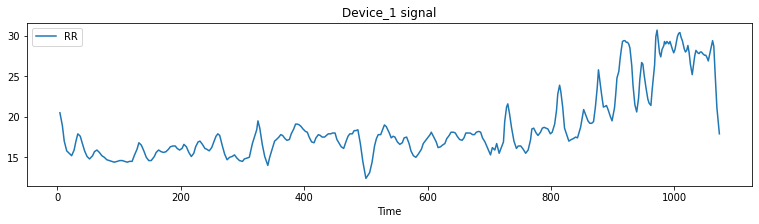

In [ ]:
############ Построение графика сигнала во врмемени ############
device1_raw.plot(x='Time', y='RR', figsize=(13,3), title='Device_1 signal', label="RR")

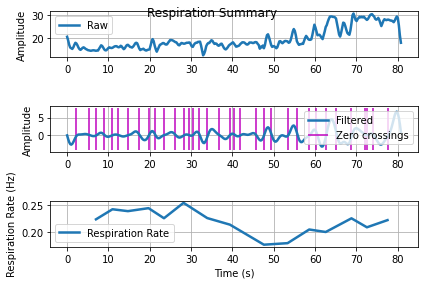

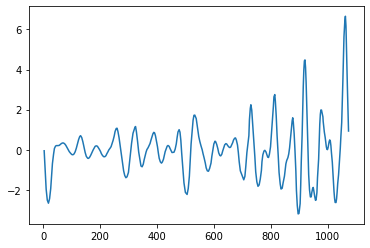

In [ ]:
device_1 = biosppy.signals.resp.resp(signal=d1, sampling_rate=4, show=True)
plt.plot(time1, device_1['filtered'])
d1 = device_1['filtered']

In [11]:
device2 = OpenSignalsReader('bitalino_data.txt')

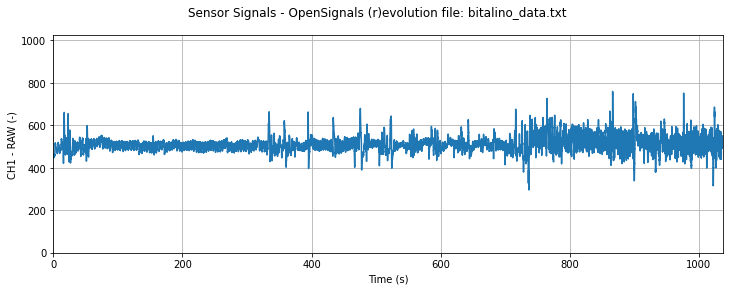

In [12]:
device2.plot(1)

Для временной калибровки второго сигнала по певрому, я отмасштабировала второй сигнал по первому, вычислив коэффициент, равный отношению конечной точки во времени на певром сигнале к максимальной временной точке на втором сигнале. Таким образом, я умножала временные точки второго сигнала на этот коэффициент и получала два сопоставленных графика относительно одной и той же абсолютной шкалы, выраженной в секундах.

In [13]:
d2 = device2.raw(1)
max_t = time1[-1]
coef = max_t/len(d2)
time2 = np.arange(0, len(d2))*coef

In [14]:
plt.figure(figsize=(15, 6))
plt.plot(time2, d3, label='device2')
plt.plot(time1, d1, label='device1')
plt.title('Comparing both signals on the whole time interval')

plt.legend()
plt.grid()
plt.show()

NameError: ignored

<Figure size 1080x432 with 0 Axes>

Далее я пробую смещать и масштабировать график Respitation Rate'a по оси Y для большей наглядности и сопоставления:

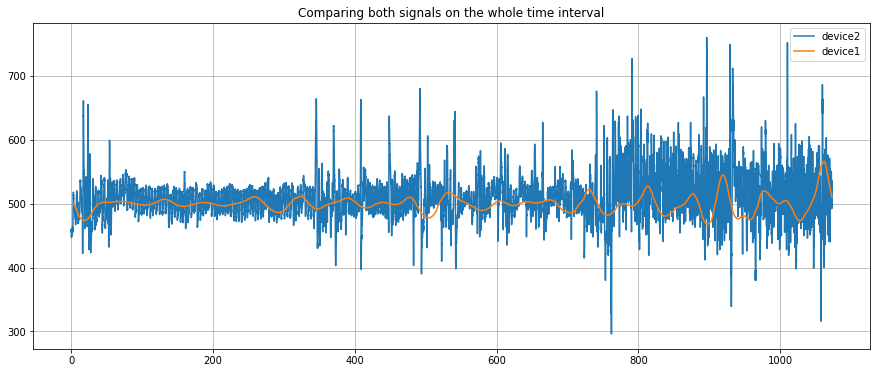

In [15]:
plt.figure(figsize=(15, 6))
plt.plot(time2, d2, label='device2')
plt.plot(time1, d1*10+500, label='device1')
plt.title('Comparing both signals on the whole time interval')
plt.legend()
plt.grid()
plt.show()

Далее я пытаюсь сгладить график эмг для лучшей наглядности


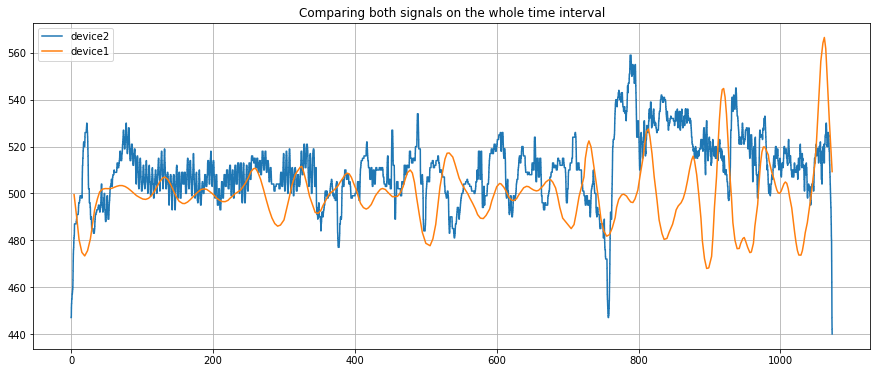

In [ ]:
d3 = biosppy.signals.tools.smoother(d2, kernel='median', size=10001)['signal']
plt.figure(figsize=(15, 6))
plt.plot(time2, d3, label='device2')
plt.plot(time1, d1*10+500, label='device1')
plt.title('Comparing both signals on the whole time interval')
plt.legend()
plt.grid()
plt.show()

**Задание 3.**

Разделение массивов на три равные части, соответствующие разным активностям.

In [ ]:
d1_1, d1_2, d1_3 = np.array_split(d1, 3)
t1_1, t1_2, t1_3 = np.array_split(time1, 3)

d2_1, d2_2, d2_3 = np.array_split(d2, 3)
d3_1, d3_2, d3_3 = np.array_split(d3, 3)

**Небольшая ремарка** - в силу своего опыта я мало работала с сигналами (сейчас взяла курс digital signal processing и надеюсь получить необходимые знания и опыт для работы в вашей лаборатории).

Все поставленные мною гипотезы - взяты из личного эмпирического опыта и анализа графиков.

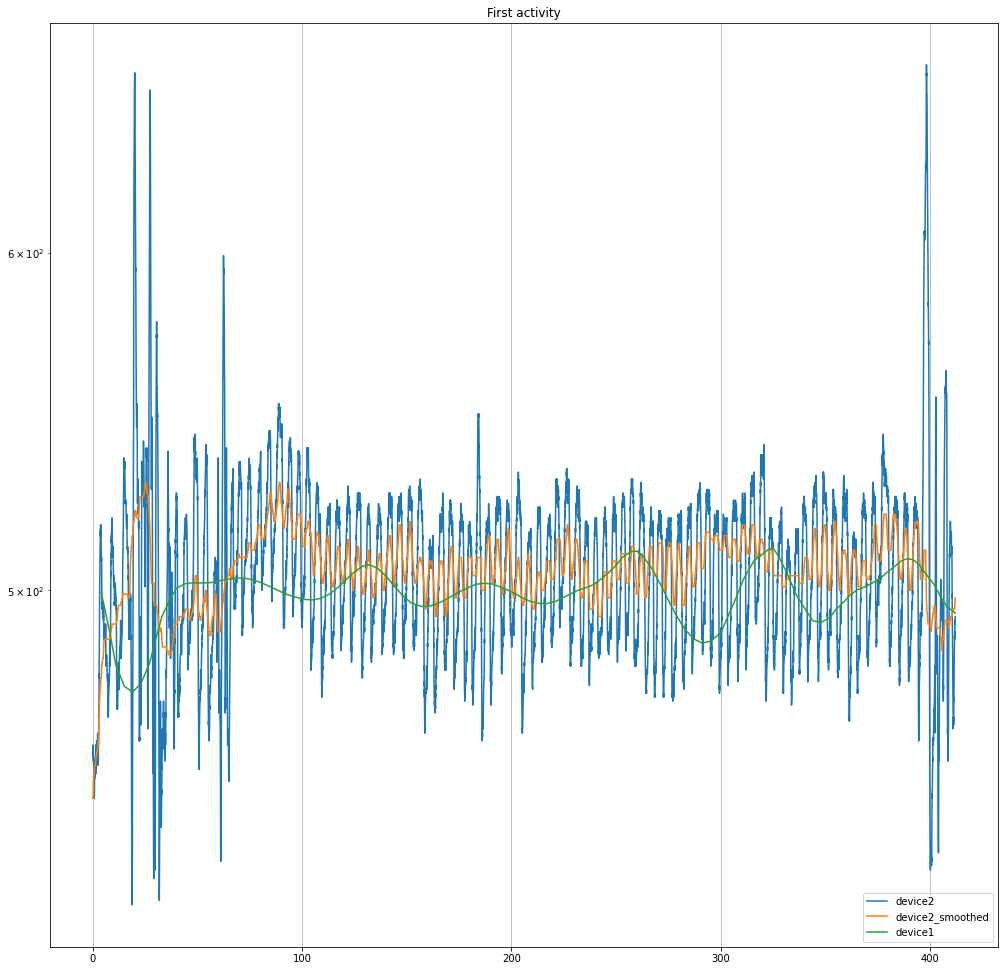

In [ ]:
max_t_1 = t1_1[-1]
coef_1 = max_t_1/len(d2_1)
t2_1 = np.arange(0, len(d2_1))*coef_1

plt.figure(figsize=(17, 17))
plt.plot(t2_1, d2_1, label='device2')
plt.plot(t2_1, d3_1, label='device2_smoothed')
plt.plot(t1_1, d1_1*10+500, label='device1')
plt.title('First activity')
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

 Во время первой активности можно увидеть низкий средний показатель частоты дыхания на первом девайсе (Bitalino). И из природы мышечного сигнала (электрический сигнал) и анализа графика, можно предположить, что низкой частоте дыхания соответствует низкая амплитуда сигнала с мышц.

 Скорее всего, это пассивная активность (человек сидит, стоит).


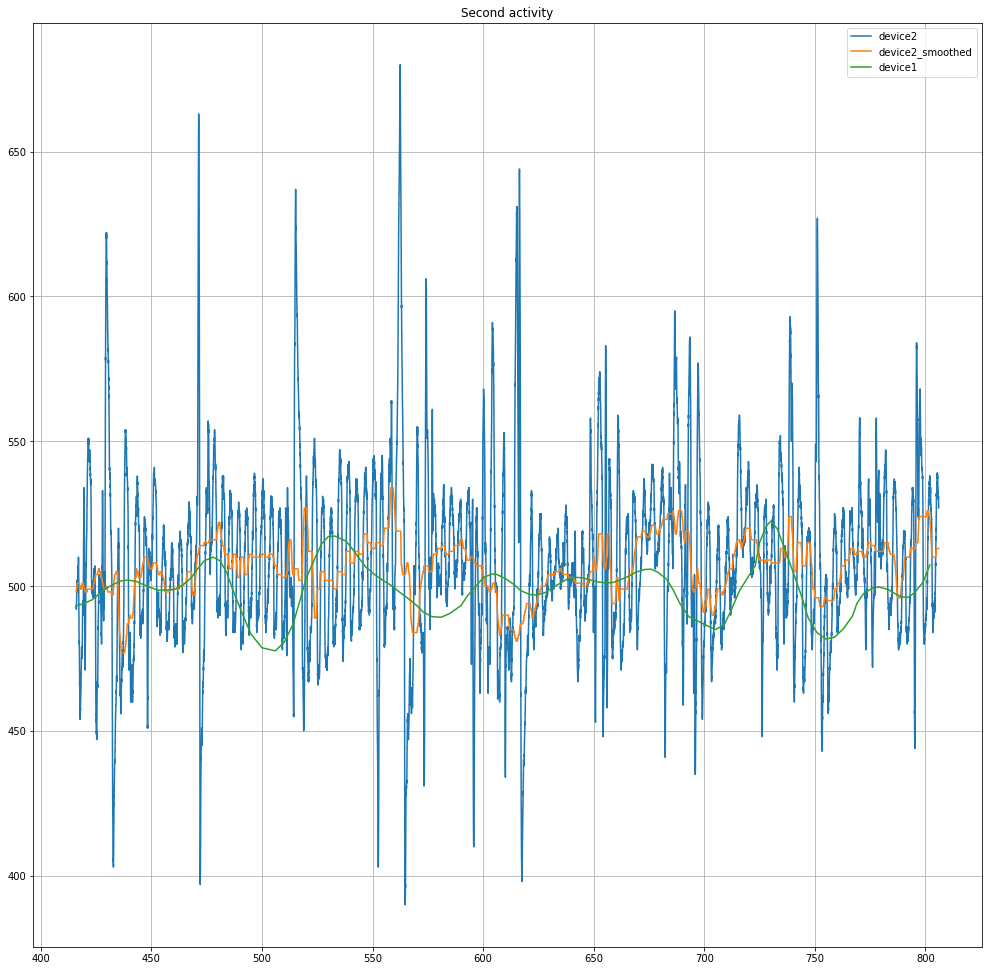

In [ ]:
max_t_2 = t1_2[-1]
coef_2 = (max_t_2-max_t_1)/len(d2_2)
t2_2 = np.arange(0, len(d2_2))*coef_2 + np.min(t1_2)

plt.figure(figsize=(17, 17))
plt.plot(t2_2, d2_2, label='device2')
plt.plot(t2_2, d3_2, label='device2_smoothed')
plt.plot(t1_2, d1_2*10+500, label='device1')
plt.title('Second activity')
# plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

График второй активности подтверждает гипотезу - здесь более высокий средний показатель RR при высокой амплитуде графика EMG.

Это похоже на спокойную физическую активность, например, ходьбу.

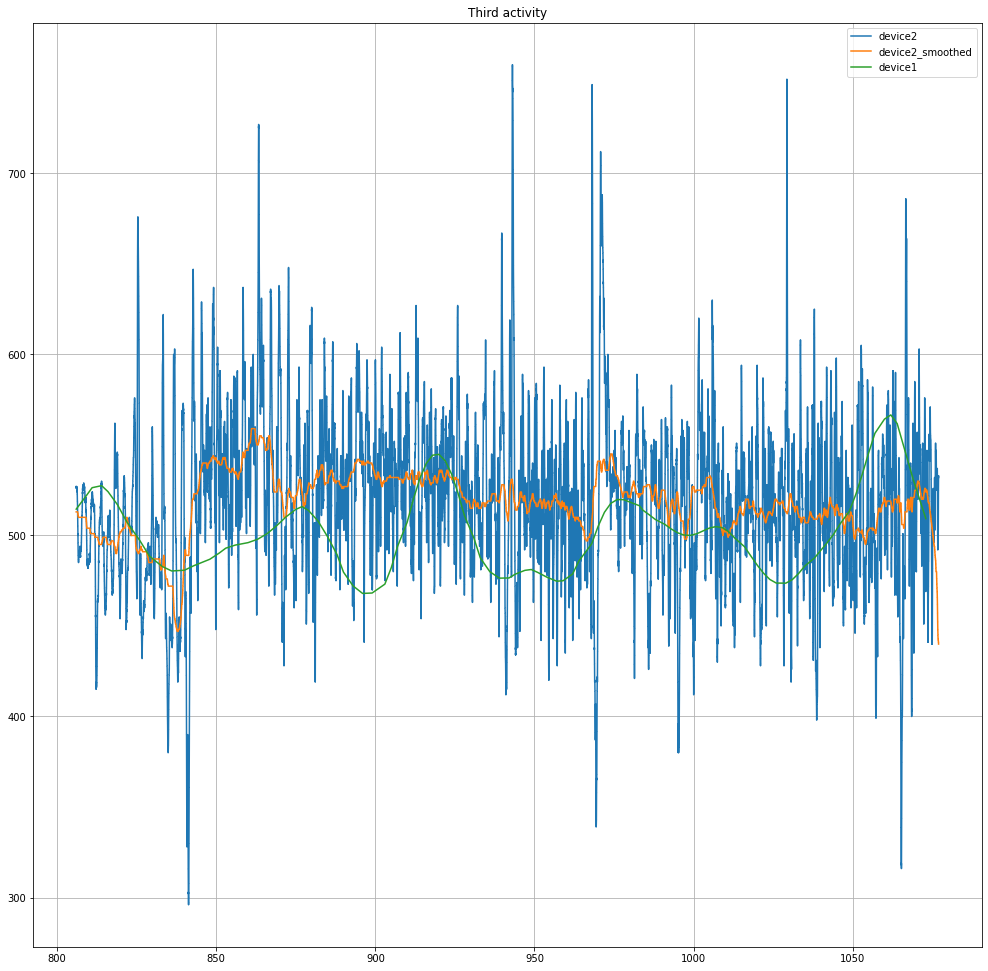

In [ ]:
max_t_3 = t1_3[-1]
coef_3 = (max_t_3-max_t_2)/len(d2_3)
t2_3 = np.arange(0, len(d2_3))*coef_3 + np.min(t1_3)

plt.figure(figsize=(17, 17))
plt.plot(t2_3, d2_3, label='device2')
plt.plot(t2_3, d3_3, label='device2_smoothed')
plt.plot(t1_3, d1_3*10+500, label='device1')
plt.title('Third activity')
plt.legend()
plt.grid()
plt.show()

**Анализируя графики, можно сделать следующий вывод об активностях:**

*1 график.* Пассивная активность - человек сидел, стоял. Оба сигнала в среднем имеют небольшую амплитуду в сравнении с остальными активностями. Наличие сигнала эмг с мышц объясняется тоническим напряжением скелетной мускулатуры человека даже в состоянии покоя, полное отсутствие колебаний потенциала не осуществляется даже при остутствии активности в этой области.

*2 график.* Умеренная физическая активность - например, ходьба. Повышена амплитуда в сравнении с первым сигналом.

*3 график.* Интенсивная физическая активность - например, бег. Самая большая амплитуда и у первого, и второго сигнала. Так же с утяжелением активности наблюдается прирост частоты сигнала ЭМГ.

И следующие выводы о взаимосвязи сигналов:

Амплитуда Respiration Rate-а положительно коррелирует с амплитудой сигнала ЭМГ. 

Нарушения в несоответствии сигналов можно объяснить артефактками различной природы - электромагнитным воздействием на приборы, потом на коже человека, психо-эмоциональным напряжением, и, что немаловажно, перед самим актом движения тоническая ЭМГ может возрастать по апмлитуде, если человек будет думать о совершении движения и концентрироваться на нем.
